<a href="https://colab.research.google.com/github/CharlotteHoyt/KWK-Goldman-Sachs-ML-Final-Project/blob/main/Charlotte_KWK_Machine_Learning_x_Finance_Challenge_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Economic Indicators of World Happiness
---

## ⚠️ Agreement Not to Use AI Tools in This Text Cell

By completing this text cell, you confirm that **you did not use any AI tools or large language models (LLMs) to generate text, code, or analysis for its content**.  

*Purpose:* This ensures that your insights, reasoning, and work in this section are fully your own.  

**Please write your responses/code manually.**

-----------------

## Research Question / Problem Statement
How do economic factors affect happiness, well-being, and societal progress around the world?

-----------------

## List of Datasets
**World Happiness Index and Inflation Dataset**

**Source:** https://www.kaggle.com/datasets/agrafintech/world-happiness-index-and-inflation-dataset

**Brief Description:** This dataset places World Happiness Index data alongside inflation metrics to explore relationships between economic conditions and happiness, well-being, and societal progress. The data is from 2015 to 2023 and represents 148 different countries.

**Why I Chose It:** I chose this dataset because it was available for download in a CSV format, it has a high usability score, and I thought it would be interesting to explore how economic prosperity and happiness levels are related (or not).

-----------------

## Summary of Dataset Use

**Instructions:** For each model you train, fill out the following section (template to copy/pase is below this list):
1.  Model type (e.g. linear regression)
2.  Dataset(s) used
3.  The metric(s) you used to evaluate the model (e.g. accuracy, f1 score, R-squared, RMSE, feature importance)
4.  The key insight(s) you discovered through training and evaluating your model.
5.  Did you use AI or LLMs to support your work on this model? If so, briefly, what did you use them for? (e.g. code generation, asking conceptual questions, etc.)

#### Model 1
*   **Model type**:

*   **Dataset(s) used**:

*   **Metric(s) used**:

*   **Key tnsight(s)**:

*   **AI/LLM use (if any)**:

#### Model 2
*   **Model type**:

*   **Dataset(s) used**:

*   **Metric(s) used**:

*   **Key tnsight(s)**:

*   **AI/LLM use (if any)**:

#### (Model 3, 4, etc. ...)

-----------------

### Overall AI/LLM Usage
**Instructions:** If you used AI or LLM tools during any part of the learning or project process, please describe your overall uses here. This may include using AI tools as a tutor, to understand code, to fix bugs, or to generate code.

[Text here - 2-4 sentences]

-----------------

## Results
[Text here - 5-10 sentences]

-----------------

## Conclusion and Recommendations
[Text here - 5-8 sentences]

-----------------

## References
**Instructions:** Include links to any additional resources, articles, etc. that you used to help interpret results, draw conclusions, and/or make recommendations

**1. pandas.DataFrame.rename**

**Link:** https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html

**Usage:** To understand how to rename columns in a pandas DataFrame.

---

## Mounting Google Drive and Loading Data

In [6]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from scipy import stats

df = pd.read_csv("/content/drive/My Drive/KWK_ML/WHI_Inflation.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Country,Year,Headline Consumer Price Inflation,Energy Consumer Price Inflation,Food Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation,GDP deflator Index growth rate,Continent/Region,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2015,-0.660,-4.250000,-0.840000,0.219999,NaN,2.665090,South Asia,3.575,0.319820,0.302850,0.303350,0.23414,0.365100,0.097190
1,Afghanistan,2016,4.380,2.070000,5.670000,5.192760,NaN,-2.409509,South Asia,3.360,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120
2,Afghanistan,2017,4.976,4.440000,6.940000,5.423228,NaN,2.404000,South Asia,3.794,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158
3,Afghanistan,2018,0.630,1.474185,-1.045952,-0.126033,NaN,2.071208,South Asia,3.632,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000
4,Afghanistan,2019,2.302,-2.494359,3.794770,NaN,NaN,6.520928,South Asia,3.203,0.350000,0.517000,0.361000,0.00000,0.158000,0.025000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 1232 non-null   object 
 1   Year                                    1232 non-null   int64  
 2   Headline Consumer Price Inflation       1200 non-null   float64
 3   Energy Consumer Price Inflation         1090 non-null   float64
 4   Food Consumer Price Inflation           1130 non-null   float64
 5   Official Core Consumer Price Inflation  734 non-null    float64
 6   Producer Price Inflation                769 non-null    float64
 7   GDP deflator Index growth rate          1211 non-null   float64
 8   Continent/Region                        1232 non-null   object 
 9   Score                                   1232 non-null   float64
 10  GDP per Capita                          1232 non-null   floa

---
## Exploratory Data Analysis


---

**Rename Columns**

---

In [8]:
# Rename columns to use the same casing conventions.
df.rename(columns = {"GDP deflator Index growth rate": "GDP Deflator Index Growth Rate",
                     "GDP per Capita": "GDP Per Capita",
                     "Social support": "Social Support",
                     "Healthy life expectancy at birth": "Healthy Life Expectancy at Birth",
                     "Freedom to make life choices": "Freedom to Make Life Choices",
                     "Perceptions of corruption": "Perceptions of Corruption"}, inplace = True)

df.head()

,Country,Year,Headline Consumer Price Inflation,Energy Consumer Price Inflation,Food Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation,GDP Deflator Index Growth Rate,Continent/Region,Score,GDP Per Capita,Social Support,Healthy Life Expectancy at Birth,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
0,Afghanistan,2015,-0.660,-4.250000,-0.840000,0.219999,NaN,2.665090,South Asia,3.575,0.319820,0.302850,0.303350,0.23414,0.365100,0.097190
1,Afghanistan,2016,4.380,2.070000,5.670000,5.192760,NaN,-2.409509,South Asia,3.360,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120
2,Afghanistan,2017,4.976,4.440000,6.940000,5.423228,NaN,2.404000,South Asia,3.794,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158
3,Afghanistan,2018,0.630,1.474185,-1.045952,-0.126033,NaN,2.071208,South Asia,3.632,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000
4,Afghanistan,2019,2.302,-2.494359,3.794770,NaN,NaN,6.520928,South Asia,3.203,0.350000,0.517000,0.361000,0.00000,0.158000,0.025000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 1232 non-null   object 
 1   Year                                    1232 non-null   int64  
 2   Headline Consumer Price Inflation       1200 non-null   float64
 3   Energy Consumer Price Inflation         1090 non-null   float64
 4   Food Consumer Price Inflation           1130 non-null   float64
 5   Official Core Consumer Price Inflation  734 non-null    float64
 6   Producer Price Inflation                769 non-null    float64
 7   GDP Deflator Index Growth Rate          1211 non-null   float64
 8   Continent/Region                        1232 non-null   object 
 9   Score                                   1232 non-null   float64
 10  GDP Per Capita                          1232 non-null   floa

---

**Calculate Measures of Central Tendency of the Numeric Variables in the Dataset**

---

In [10]:
cols = ["Year",
        "Headline Consumer Price Inflation",
        "Energy Consumer Price Inflation",
        "Food Consumer Price Inflation",
        "Official Core Consumer Price Inflation",
        "Producer Price Inflation",
        "GDP Deflator Index Growth Rate",
        "Score",
        "GDP Per Capita",
        "Social Support",
        "Healthy Life Expectancy at Birth",
        "Freedom to Make Life Choices",
        "Generosity",
        "Perceptions of Corruption"]

for col in cols:
  print(f"\n--- {col.upper()} ---")

  # Calculate mean.
  mean = df[col].mean()
  print(f"Mean: {mean}")

  # Calculate median.
  median = df[col].median()
  print(f"Median: {median}")

  # Calculate mode.
  mode_result = stats.mode(df[col], keepdims = True)
  mode = mode_result.mode[0]
  count_mode = mode_result.count[0]
  print(f"Mode: {mode} (appears {count_mode} times)")


--- YEAR ---
Mean: 2018.8952922077922
Median: 2019.0
Mode: 2015 (appears 142 times)

--- HEADLINE CONSUMER PRICE INFLATION ---
Mean: 7.395445129263787
Median: 3.4761463897560256
Mode: nan (appears 32 times)

--- ENERGY CONSUMER PRICE INFLATION ---
Mean: 6.424232699590625
Median: 2.769177594333237
Mode: nan (appears 142 times)

--- FOOD CONSUMER PRICE INFLATION ---
Mean: 8.030094019526146
Median: 3.7289971113204956
Mode: nan (appears 102 times)

--- OFFICIAL CORE CONSUMER PRICE INFLATION ---
Mean: 3.512611817533167
Median: 2.2456727027893066
Mode: nan (appears 498 times)

--- PRODUCER PRICE INFLATION ---
Mean: 5.841886827375673
Median: 2.7292556457966253
Mode: nan (appears 463 times)

--- GDP DEFLATOR INDEX GROWTH RATE ---
Mean: 7.070015379547317
Median: 3.244246270708621
Mode: nan (appears 21 times)

--- SCORE ---
Mean: 5.499000649271104
Median: 5.538949913
Mode: 6.125 (appears 4 times)

--- GDP PER CAPITA ---
Mean: 1.0307665294569806
Median: 1.0514999999999999
Mode: 0.0 (appears 6 ti

---

**Calculate Spread and Variation**

---

In [11]:
for col in cols:
    print(f"\n--- {col.upper()} ---")

    min = df[col].min()
    print(f"Min: {min}")

    max = df[col].max()
    print(f"Max: {max}")

    range = max - min
    print(f"Range: {range}")

    quartile_1 = df[col].quantile(0.25)
    quartile_3 = df[col].quantile(0.75)
    interquartile_range = quartile_3 - quartile_1
    print(f"IQR: {interquartile_range}")

    standard_deviation = df[col].std()
    print(f"Standard Deviation: {standard_deviation}")


--- YEAR ---
Min: 2015
Max: 2023
Range: 8
IQR: 4.0
Standard Deviation: 2.5546015719786634

--- HEADLINE CONSUMER PRICE INFLATION ---
Min: -3.7529959678649902
Max: 557.21
Range: 560.962995967865
IQR: 5.473448762155316
Standard Deviation: 25.165913924329914

--- ENERGY CONSUMER PRICE INFLATION ---
Min: -23.8799991607666
Max: 306.431673052363
Range: 330.3116722131296
IQR: 6.493733568787575
Standard Deviation: 16.591503196518637

--- FOOD CONSUMER PRICE INFLATION ---
Min: -22.030000686645508
Max: 601.020235612423
Range: 623.0502362990685
IQR: 8.02921921415329
Standard Deviation: 26.170251398346913

--- OFFICIAL CORE CONSUMER PRICE INFLATION ---
Min: -28.619415283203125
Max: 58.85186307
Range: 87.47127835320313
IQR: 3.585155189037323
Standard Deviation: 5.513661490731723

--- PRODUCER PRICE INFLATION ---
Min: -83.33978077593912
Max: 128.47663756170698
Range: 211.8164183376461
IQR: 8.716851035342115
Standard Deviation: 13.679283858679486

--- GDP DEFLATOR INDEX GROWTH RATE ---
Min: -26.1000

---

**Visualizations of Spread (Box Plots)**

---

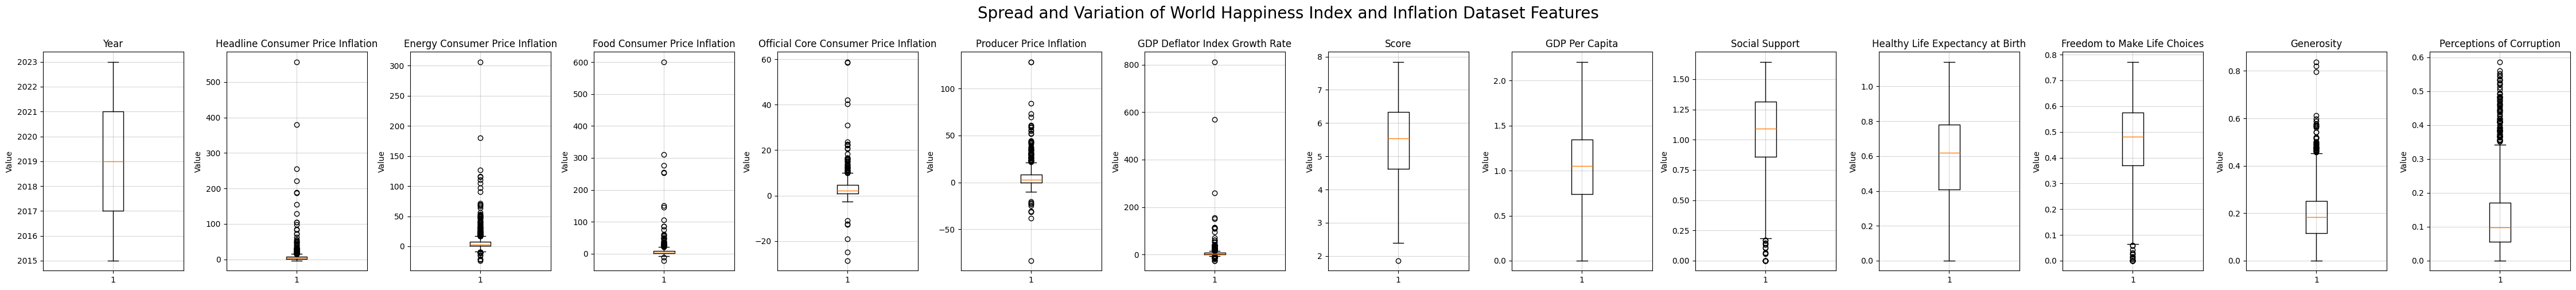

In [27]:
import matplotlib.pyplot as plt

# Numeric columns to visualize.
cols = ["Year",
        "Headline Consumer Price Inflation",
        "Energy Consumer Price Inflation",
        "Food Consumer Price Inflation",
        "Official Core Consumer Price Inflation",
        "Producer Price Inflation",
        "GDP Deflator Index Growth Rate",
        "Score",
        "GDP Per Capita",
        "Social Support",
        "Healthy Life Expectancy at Birth",
        "Freedom to Make Life Choices",
        "Generosity",
        "Perceptions of Corruption"]

# Create box plot for each feature.
fig, axes = plt.subplots(nrows = 1, ncols = 14, figsize = (45, 5))

for i, col in enumerate(cols):
  axes[i].set_title(col)
  axes[i].set_ylabel("Value")
  axes[i].boxplot(df[col].dropna(), vert = True)
  axes[i].grid(True, linestyle = "-", alpha = 0.5)

plt.suptitle("Spread and Variation of World Happiness Index and Inflation Dataset Features", fontsize = 20, y = 1)
plt.tight_layout()
plt.show()

---

**Correlation Matrix**

---

In [28]:
# Numeric columns to look at.
cols = ["Year",
        "Headline Consumer Price Inflation",
        "Energy Consumer Price Inflation",
        "Food Consumer Price Inflation",
        "Official Core Consumer Price Inflation",
        "Producer Price Inflation",
        "GDP Deflator Index Growth Rate",
        "Score",
        "GDP Per Capita",
        "Social Support",
        "Healthy Life Expectancy at Birth",
        "Freedom to Make Life Choices",
        "Generosity",
        "Perceptions of Corruption"]

# Display the correlation matrix.
df[cols].corr()

,Year,Headline Consumer Price Inflation,Energy Consumer Price Inflation,Food Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation,GDP Deflator Index Growth Rate,Score,GDP Per Capita,Social Support,Healthy Life Expectancy at Birth,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
Year,1.000000,0.090641,0.206466,0.153506,0.225981,0.316968,0.100608,0.057852,0.332313,0.014955,-0.150402,0.297570,-0.294839,0.039235
Headline Consumer Price Inflation,0.090641,1.000000,0.810574,0.930110,0.878240,0.704857,0.674593,-0.199939,-0.079311,-0.114423,-0.159840,-0.130848,-0.045646,-0.067766
Energy Consumer Price Inflation,0.206466,0.810574,1.000000,0.751257,0.395492,0.653704,0.619768,-0.135052,0.039931,-0.089555,-0.129704,-0.042858,-0.068237,-0.019663
Food Consumer Price Inflation,0.153506,0.930110,0.751257,1.000000,0.702189,0.653051,0.864982,-0.171712,-0.022762,-0.081649,-0.116515,-0.099959,-0.070262,-0.078781
Official Core Consumer Price Inflation,0.225981,0.878240,0.395492,0.702189,1.000000,0.503089,0.674664,-0.224613,-0.008524,-0.085290,-0.358293,-0.141493,-0.138080,-0.104560
Producer Price Inflation,0.316968,0.704857,0.653704,0.653051,0.503089,1.000000,0.779785,-0.078300,0.107347,-0.093354,-0.163686,0.030858,-0.166508,-0.061562
GDP Deflator Index Growth Rate,0.100608,0.674593,0.619768,0.864982,0.674664,0.779785,1.000000,-0.143874,-0.054971,-0.068147,-0.135997,-0.075051,-0.043975,-0.045112
Score,0.057852,-0.199939,-0.135052,-0.171712,-0.224613,-0.078300,-0.143874,1.000000,0.739683,0.657575,0.702422,0.565723,0.098285,0.436428
GDP Per Capita,0.332313,-0.079311,0.039931,-0.022762,-0.008524,0.107347,-0.054971,0.739683,1.000000,0.550553,0.561899,0.456812,-0.146000,0.342415
Social Support,0.014955,-0.114423,-0.089555,-0.081649,-0.085290,-0.093354,-0.068147,0.657575,0.550553,1.000000,0.578898,0.370869,0.025838,0.169471
